In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy.sparse as sps
from sklearn.feature_selection import SelectFromModel
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import itertools

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    rcParams['figure.figsize'] = 8, 8
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
bins0 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.5632754522868506],
        [9.5632754522868506, np.inf]]
bnames0 = ['very bad', 'bad', 'average', 'good', 'very good']

bins5 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames5 = ['very bad', 'bad', 'average', 'good', 'very good']

bins4 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames4 = ['bad', 'average', 'good', 'very good']

bins3 = [[-np.inf, 8],
        [8,9.5],
        [9.5, np.inf]]
bnames3 = ['bad', 'average', 'good']

bins2 = [[-np.inf, 9],
        [9, np.inf]]

bnames2 = ['below', 'above']

In [4]:
bin1 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 9.9],
        [9.9, np.inf]]
bin1Names = ['very bad', 'center', 'very good']

bin2 = [[7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.9]]
bin2Names = ['bad', 'average', 'good']

In [5]:
def scoreLabel(x, bins):
    for i in range(len(bins)):
        if bins[i][0] < x <= bins[i][1]:
            return i
def scoreLabelOneHot(x, bins):
    for i in range(len(bins)):
        if bins[i][0] < x <= bins[i][1]:
            retVec = np.zeros(len(bins))
            retVec[i] = 1
            return retVec

In [6]:
#featureMatrix = sps.load_npz('./Datasets_2/Regression_Features.npz')
featureMatrix = sps.load_npz('./Week7Dataset/Regression_Feat_Selection_VarThr.npz')
labels = np.load('./Week7Dataset/Regression_Labels.npz')['arr_0']

In [7]:
bins = bins5
bnames = bnames5
#fname = 'bin2classification.png'

#clsLabels = np.array([scoreLabelOneHot(i, bins) for i in labels])
clsLabels = np.array([scoreLabel(i, bins) for i in labels])

cnt = collections.Counter(clsLabels)
i = 0
for c in cnt:
    print bnames[i], 1.0 * cnt[c] / len(clsLabels)
    i+=1

very bad 0.203876923579
bad 0.127341526467
average 0.15977426747
good 0.260024628332
very good 0.248982654151


In [8]:
train, test, train_labels, test_labels = train_test_split(featureMatrix,clsLabels,test_size=.33,random_state=42)
train = MaxAbsScaler().fit_transform(train)
test = MaxAbsScaler().fit_transform(test)

In [39]:
train_stp1 = train.copy()
train_l_stp1 = train_labels.copy()
train_l_stp1[np.where(np.logical_and(train_l_stp1>=1, train_l_stp1<=3))] = 5

train_stp2 = train[np.where(np.logical_and(train_labels>=1, train_labels<=3))].copy()
train_l_stp2 = train_labels[np.where(np.logical_and(train_labels>=1, train_labels<=3))].copy()

In [42]:
test_stp1 = test.copy()
test_l_stp1 = test_labels.copy()
test_l_stp1[np.where(np.logical_and(test_l_stp1>=1, test_l_stp1<=3))] = 5

test_stp2 = test[np.where(np.logical_and(test_labels>=1, test_labels<=3))].copy()
test_l_stp2 = test_labels[np.where(np.logical_and(test_labels>=1, test_labels<=3))].copy()

In [44]:
cls1 = OneVsRestClassifier(LinearSVC(class_weight='balanced', random_state=0))
cls1.fit(train_stp1, train_l_stp1)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [45]:
cls2 = OneVsRestClassifier(LinearSVC(class_weight='balanced', random_state=0))
cls2.fit(train_stp2, train_l_stp2)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

Normalized confusion matrix
[[ 0.77018446  0.03326278  0.19655277]
 [ 0.05547836  0.68697896  0.25754268]
 [ 0.22122274  0.28545598  0.49332128]]


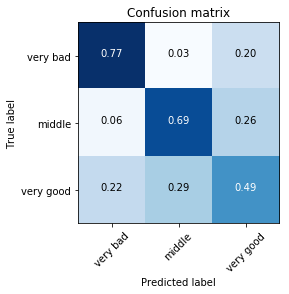

In [81]:
pred_stp1 = cls1.predict(test_stp1)
cm = confusion_matrix(test_l_stp1,pred_stp1).astype(float)
plot_confusion_matrix(cm.astype(np.int),['very bad', 'middle', 'very good'], normalize=True)
#plt.savefig(fname)
plt.show()

Normalized confusion matrix
[[ 0.39550583  0.47998843  0.12450574]
 [ 0.23920162  0.54693591  0.21386247]
 [ 0.12441805  0.4672209   0.40836105]]


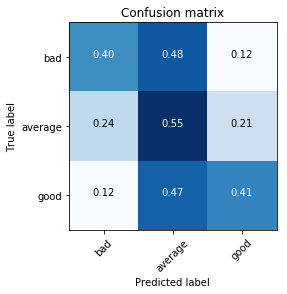

In [15]:
pred_stp2 = cls1.predict(test_stp2)
cm = confusion_matrix(test_l_stp2,pred_stp2).astype(float)
plot_confusion_matrix(cm.astype(np.int),['bad', 'average', 'good'], normalize=True)
#plt.savefig(fname)
plt.show()

In [46]:
pred = cls1.predict(test)
midPredicted = test[np.where(pred == 5)]
pred2 = cls2.predict(midPredicted)
pred[np.where(pred == 5)] = pred2

Normalized confusion matrix
[[ 0.5386828   0.17346982  0.12977454  0.11078212  0.04729072]
 [ 0.18923137  0.22499675  0.23019899  0.23566133  0.11991156]
 [ 0.11886051  0.18909627  0.25363458  0.30058939  0.13781925]
 [ 0.04718503  0.1066301   0.21479271  0.4003065   0.23108566]
 [ 0.02035228  0.04777235  0.10150237  0.31808763  0.51228538]]


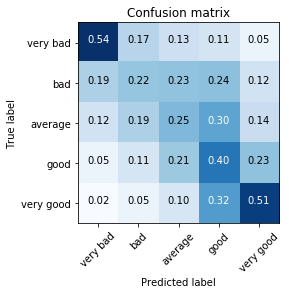

In [47]:
cm = confusion_matrix(pred,test_labels).astype(float)
plot_confusion_matrix(cm.astype(np.int),['very bad', 'bad', 'average', 'good', 'very good'], normalize=True)
#plt.savefig(fname)
plt.show()

In [52]:
ccm = np.array([[ 0.39550583,  0.47998843 , 0.12450574],
 [ 0.23920162,  0.54693591 , 0.21386247],
 [ 0.12441805,  0.4672209,   0.40836105]])

ccm * .49

array([[ 0.19379786,  0.23519433,  0.06100781],
       [ 0.11720879,  0.2679986 ,  0.10479261],
       [ 0.06096484,  0.22893824,  0.20009691]])

In [32]:
finPred = []

for i in range(pred1.shape[0]):
    p = pred1[i]
    if p == 0:
        finPred.append(0)
    if p == 2:
        finPred.append(4)
    if p == 1:
        p2 = cls2.predict(test[i])
        if p2 == 0:
            finPred.append(1)
        if p2 == 1:
            finPred.append(2)
        if p2 == 2:
            finPred.append(3)

Normalized confusion matrix
[[ 0.77018446  0.08799516  0.07317811  0.0353795   0.03326278]
 [ 0.39550583  0.16684348  0.18564953  0.12749542  0.12450574]
 [ 0.23920162  0.13800094  0.20130984  0.20762514  0.21386247]
 [ 0.12441805  0.08608076  0.14536817  0.23577197  0.40836105]
 [ 0.05547836  0.04575228  0.06962088  0.14216951  0.68697896]]


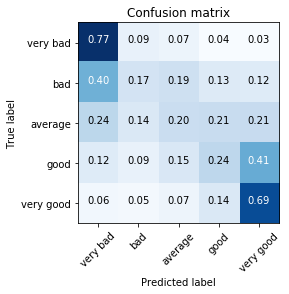

In [80]:
cm = confusion_matrix(test_labels,finPred).astype(float)
plot_confusion_matrix(cm.astype(np.int),['very bad', 'bad', 'average', 'good', 'very good'], normalize=True)
#plt.savefig(fname)
plt.show()

In [63]:
cm

array([[ 12735.,   4101.,   3068.,   2619.,   1118.],
       [  1455.,   1730.,   1770.,   1812.,    922.],
       [  1210.,   1925.,   2582.,   3060.,   1403.],
       [   585.,   1322.,   2663.,   4963.,   2865.],
       [   550.,   1291.,   2743.,   8596.,  13844.]])

In [65]:
cm

array([[ 12735.,    550.,   3250.],
       [  1118.,  13844.,   5190.],
       [  9788.,  12630.,  21827.]])

In [76]:
cm[0,:].sum()

23641.0

In [79]:
cm[:,0].sum()

23641.0